In [1]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
n_task_per_file = 50
n_files = 10
base_dir = "noise_sd=2/vary_r_nomarg_noisesd_2.0_n_200_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [6]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [7]:
coverage_df

,0.1,0.2,0.3,0.4,0.5,full,UV(0.1)
0,0.666667,1.000000,0.666667,0.500000,0.833333,1.000000,1.000000
1,0.833333,0.666667,0.800000,0.833333,0.666667,0.833333,1.000000
2,0.833333,0.833333,1.000000,0.500000,0.714286,1.000000,1.000000
3,1.000000,1.000000,0.833333,0.833333,0.833333,0.833333,1.000000
4,1.000000,1.000000,0.666667,1.000000,0.666667,0.833333,0.833333
...,...,...,...,...,...,...,...
45,0.857143,1.000000,0.714286,0.666667,0.333333,0.833333,1.000000
46,0.500000,0.571429,0.714286,0.600000,0.666667,1.000000,0.833333
47,0.800000,0.800000,0.666667,0.833333,1.000000,1.000000,1.000000
48,0.833333,1.000000,0.833333,0.833333,0.833333,1.000000,1.000000


In [8]:
length_df

,0.1,0.2,0.3,0.4,0.5,full,UV(0.1)
0,7.434352,9.416799,9.466933,10.194163,10.156733,6.591492,21.821449
1,8.996060,9.647443,9.229535,9.504650,9.786356,6.470361,21.821449
2,9.061081,9.626331,11.129069,9.934256,10.751342,6.719754,21.821449
3,7.769198,9.586896,10.665543,9.055904,9.267196,6.552327,21.821449
4,9.509630,9.886899,9.955159,9.518711,9.737166,6.599165,21.821449
...,...,...,...,...,...,...,...
45,8.986801,10.152710,9.255394,10.397505,8.821589,6.527382,21.821449
46,9.212531,8.912029,9.270167,8.350606,8.519962,6.614666,21.821449
47,9.343228,8.637317,9.910126,9.504541,9.825685,6.574605,21.821449
48,9.118660,9.173338,9.413761,9.743881,9.922228,6.488296,21.821449


In [9]:
MSE_df

,0.1,0.2,0.3,0.4,0.5,full,UV(0.1)
0,5.341335,4.894927,5.321379,4.951045,4.904826,4.904826,4.714075
1,4.517711,4.195855,4.969250,4.297284,4.391626,4.391626,4.450949
2,4.794981,4.597818,4.955181,5.470630,4.531494,4.531494,5.215863
3,5.682467,5.575749,5.151579,5.193556,5.388647,5.388647,5.294132
4,5.214592,5.090848,5.286123,5.546629,5.230870,5.230870,4.898136
...,...,...,...,...,...,...,...
45,4.320284,4.256404,4.291123,4.180269,4.287566,4.287566,4.492515
46,4.942422,5.713086,5.070627,5.057625,4.945803,4.945803,4.750482
47,6.090399,6.316244,5.459326,6.025167,5.373495,5.373495,6.058637
48,4.702516,5.074007,4.587042,4.704927,4.922211,4.922211,4.650897


In [10]:
def boxplots(dfs, metrics):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        sns.boxplot(data=df, ax=axes[i], showmeans=True)
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        """for j, mean in enumerate(means):
            print(j, mean)
            axes[i].plot(j, mean, marker='^', color='red', markersize=10)  # Add a red triangle for the mean"""
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
        elif metric == "Length":
            axes[i].set_ylim(0,50)
        elif metric == "MSE":
            axes[i].set_ylim(0,10)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

Coverage :
 0.1        0.864686
0.2        0.904733
0.3        0.790162
0.4        0.703276
0.5        0.623371
full       0.824581
UV(0.1)    0.895762
dtype: float64
Length :
 0.1         9.059749
0.2         9.508483
0.3         9.730373
0.4         9.777490
0.5         9.706928
full        6.555586
UV(0.1)    21.821449
dtype: float64
MSE :
 0.1        4.881666
0.2        4.879047
0.3        4.886711
0.4        4.902935
0.5        4.912592
full       4.912592
UV(0.1)    4.849463
dtype: float64


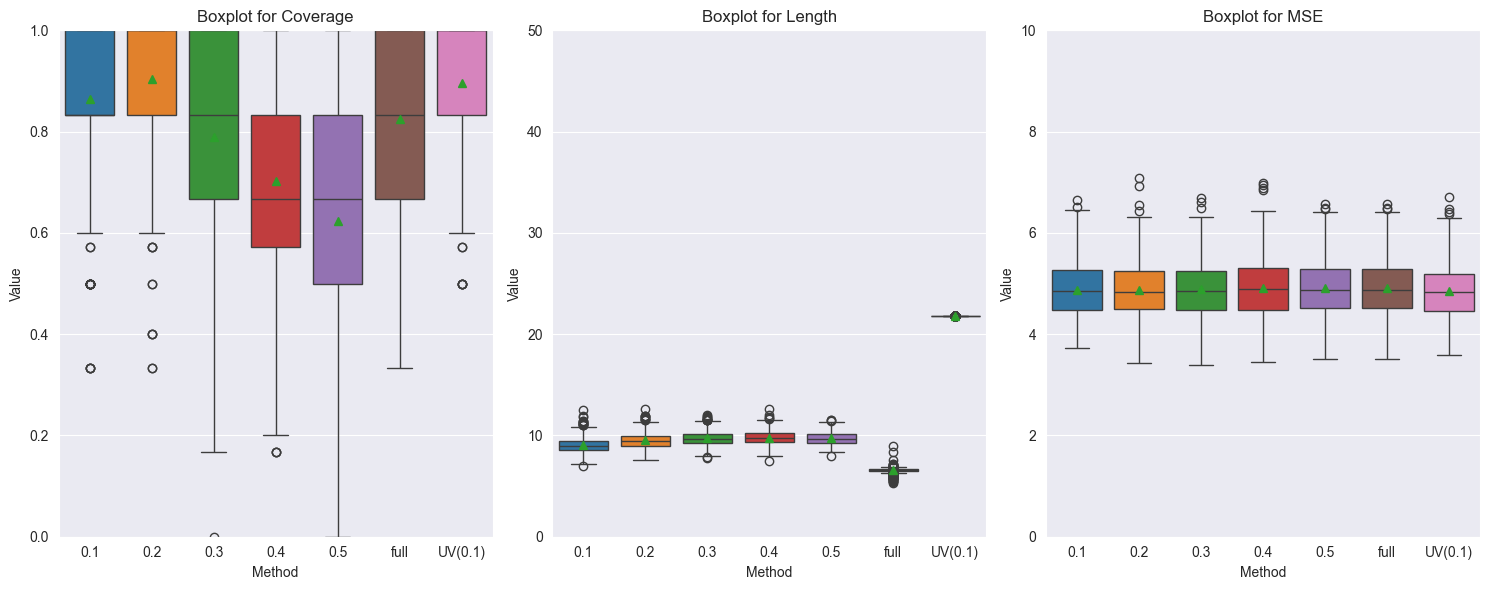

In [11]:
boxplots(dfs=[coverage_df, length_df, MSE_df], metrics=["Coverage", "Length", "MSE"])

Coverage :
 0.1        0.882143
0.2        0.775595
0.3        0.645714
0.4        0.627381
0.5        0.583571
0.6        0.561667
0.7        0.551369
0.8        0.513155
full       0.830119
UV(0.1)    0.906250
dtype: float64
Length :
 0.1        40.478966
0.2        26.498739
0.3        22.802259
0.4        20.992620
0.5        18.630494
0.6        16.885335
0.7        15.342226
0.8        13.685779
full        6.687487
UV(0.1)    21.821449
dtype: float64
MSE :
 0.1        4.614567
0.2        4.646398
0.3        4.650816
0.4        4.604210
0.5        4.636576
0.6        4.658551
0.7        4.658513
0.8        4.681474
full       4.681474
UV(0.1)    4.792256
dtype: float64


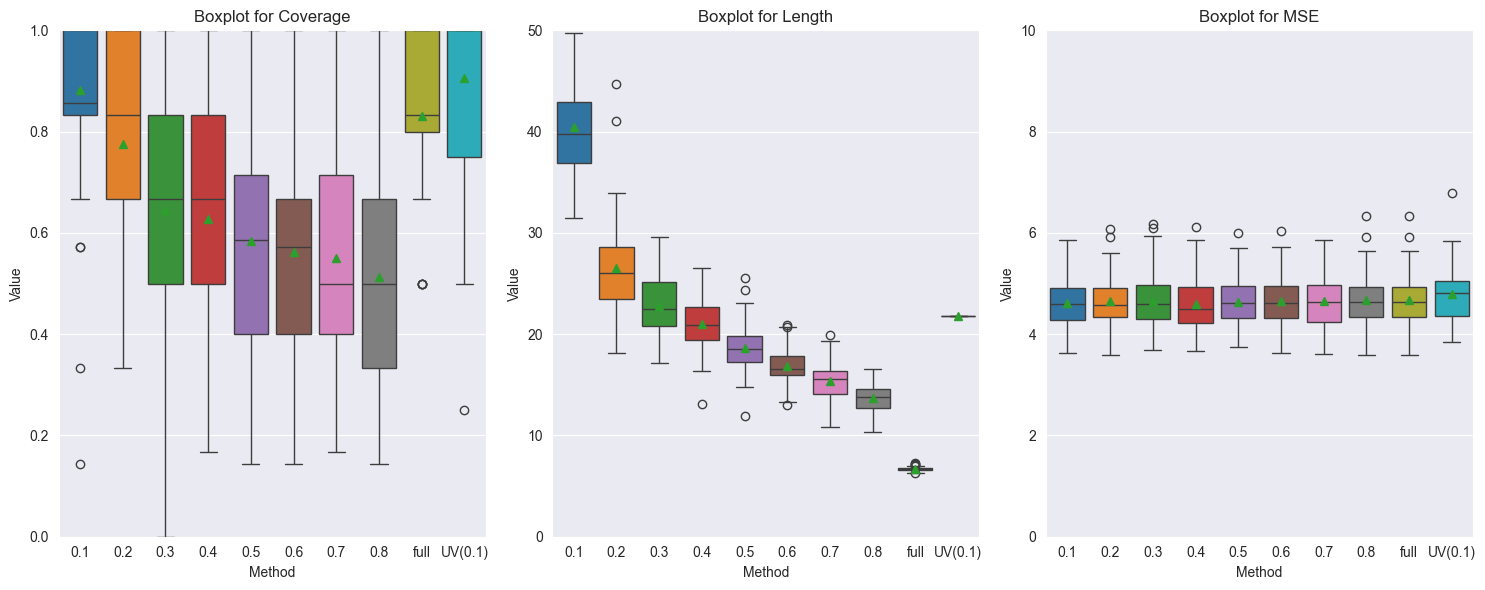

In [737]:
boxplots(dfs=[coverage_df, length_df, MSE_df], metrics=["Coverage", "Length", "MSE"])

In [682]:
coverage_df

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,full,UV(0.1)
0,0.857143,0.833333,1.000000,0.833333,1.000000,0.833333,1.000000,0.833333,0.666667,0.75
1,1.000000,1.000000,1.000000,1.000000,1.000000,0.166667,1.000000,0.571429,0.857143,1.00
2,1.000000,0.666667,1.000000,0.571429,0.714286,0.833333,0.833333,0.666667,0.833333,1.00
3,1.000000,1.000000,1.000000,0.571429,1.000000,0.571429,1.000000,0.833333,0.833333,0.75
4,0.800000,1.000000,0.200000,0.600000,1.000000,0.166667,1.000000,1.000000,0.800000,1.00
...,...,...,...,...,...,...,...,...,...,...
21,1.000000,0.800000,1.000000,1.000000,1.000000,0.833333,1.000000,0.833333,0.833333,0.50
22,1.000000,0.833333,1.000000,0.833333,1.000000,1.000000,0.666667,0.166667,0.333333,0.50
23,1.000000,0.833333,1.000000,0.833333,0.500000,1.000000,0.833333,1.000000,1.000000,0.50
24,0.666667,0.333333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00


In [397]:
a = np.random.multivariate_normal(mean=np.zeros(3), cov=np.eye(3), size=10)

In [403]:
a

array([[ 1.06793651,  1.36987016,  0.38254673],
       [-0.00676015,  0.04964653,  0.54545289],
       [ 0.36283111,  1.14141412, -0.09072415],
       [-0.35752269,  0.12027834,  1.73155615],
       [-0.2604219 , -0.41158687,  0.85320342],
       [-0.06342349,  0.26980504,  0.54805346],
       [ 3.11418919, -0.40739602,  0.14077256],
       [-1.10491165,  0.58322557, -0.02100113],
       [ 1.94883554,  0.87846771, -0.46144371],
       [-1.41438826,  0.90600893,  1.3235796 ]])

In [406]:
a.max(axis=1) < 1

array([False,  True, False, False,  True,  True, False,  True, False,
       False])

In [36]:
a.min(axis=1) > -1

5

In [413]:
np.logical_and(a.min(axis=1) > -1, a.max(axis=1) < 1).sum()

np.int64(3)

True